<a href="https://colab.research.google.com/github/shawnjiang1019/dataStructures/blob/main/ds_tutorial_dataera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Tutorial for DataEra IT Club

## Orientation

### Tool chain
- **Colab** => online data science platform (minimal setup compared to local platform)
- **Jupyter notebook** => file format (.ipynb) that mixes input code/text and output text/charts. Related to but different from *Jupyter Notebook*, a web app that edits/runs Jupyter notebooks
- **Markdown** => formatted notes (file) popular among data scientists and software developers. A shorthand of HTML
- **Python** => Top 1 programming language for data science

### Colab orientation

- **Connected runtime** ("hosted" for beginners)
- **Side pane** ("Files" = in the runtime environment, table of contents, find & replace, code snippets, command palette, terminal...)
- **Menu** (download .ipynb, scratch code cell, clear all outputs...)
- **Setting** (theme, pro features...)

### Markdown/Jupyter notebook tutorial

#### Markdown cell


Markdown allows you to quickly type up formatted notes, such as **bold**, _italic_, ~strikethrough~ text... 

and bulleted (unordered) list:
- One
- Two
- Three

and numbered (ordered) list:
1. One
1. Two
1. Three

and inline code such as `my_data_set.csv`...  
and syntax highlighted code block such as:
```python
# Syntax highlighted code block (part of Markdown cell, cannot run)
print('Hello world - welcome to Data Science Summer Camp by DataEra IT Club!')
```

#### Code cell

In [5]:
# Code cell (can run)
print('Hello world - welcome to Data Science Summer Camp by DataEra IT Club!')
help(print)

Hello world - welcome to Data Science Summer Camp by DataEra IT Club!
Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [7]:
# "Magic" cell (code cell with special predefined commands) -- HTML
%%html
<marquee direction='left'; style='width: 30%; color: blue;'><b>Hello world - welcome to Data Science Summer Camp by DataEra IT Club!</b></marquee>

In [8]:
# "Magic" cell -- names in current name space
%whos

Interactive namespace is empty.


In [9]:
# "Magic" cell -- shell command (to show Colab's OS info)
!uname -a

Linux 7f991ea55573 5.4.104+ #1 SMP Sat Jun 5 09:50:34 PDT 2021 x86_64 x86_64 x86_64 GNU/Linux


### Hands-on time

_(break for info digestion / hands-on exercise)_

## Python demos

### Prep

#### Set up work files/runtime


- Use "File" > "Save a copy in Drive" to keep a local copy
- Upload CSV data file
- Connect to hosted runtime

#### Import packages & define custom functions

In [ ]:
# Import packages & define custom functions
import pandas as pd              # Data manipulation must-have -- pandas package (implicitly relies on numpy package)
from scipy import stats          # Statistics & basic ML packages
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook
# from bokeh.charts import BoxPlot, output_file, show

from IPython.display import Markdown, display  # Define own function to print Markdown text
def printmd(string):
    display(Markdown(string))

#### Read & profile data

In [ ]:
# Read & profile data
%unload_ext google.colab.data_table
df = pd.read_csv('data_set_workout.csv')  # Upload data file before using. Will be erased after session expiry
df.info()
df.head(-1)  # head() defaults to 5 rows. Also there is tail()

The google.colab.data_table extension is not loaded.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         163 non-null    int64  
 1   Average_Pulse    163 non-null    int64  
 2   Max_Pulse        163 non-null    int64  
 3   Calorie_Burnage  163 non-null    int64  
 4   Hours_Work       163 non-null    float64
 5   Hours_Sleep      163 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 7.8 KB


,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,60,110,130,409,0.0,8.0
1,60,117,145,479,0.0,8.0
2,60,103,135,340,8.0,7.5
3,45,109,175,282,8.0,8.0
4,45,117,148,406,0.0,6.5
...,...,...,...,...,...,...
157,45,100,140,280,0.0,7.0
158,60,105,140,290,7.0,8.0
159,60,110,145,300,7.0,8.0
160,60,115,145,310,8.0,8.0


In [ ]:
%load_ext google.colab.data_table 
df

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,60,110,130,409,0.0,8.0
1,60,117,145,479,0.0,8.0
2,60,103,135,340,8.0,7.5
3,45,109,175,282,8.0,8.0
4,45,117,148,406,0.0,6.5
...,...,...,...,...,...,...
158,60,105,140,290,7.0,8.0
159,60,110,145,300,7.0,8.0
160,60,115,145,310,8.0,8.0
161,75,120,150,320,0.0,8.0


### Data Vis(usalization) demo

#### `seaborn` heat map

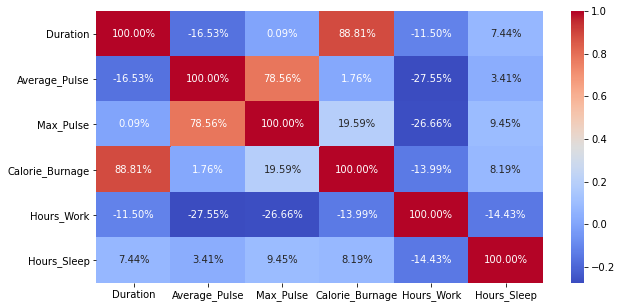

In [ ]:
import seaborn as sns            # Data visualization with seaborn package
plt.figure(figsize=(10,5))
seaborn_heat_map = sns.heatmap(df.corr(),
                               annot=True,
                               fmt='.2%',
                               cmap='coolwarm')
# Among which pair of columns do you find the strongest correlation?

#### `bokeh` histogram

In [ ]:
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
output_notebook()

data = np.random.normal(0, 0.5, 1000)
# hist, edges = np.histogram(data, density=True, bins=10)
hist, edges = np.histogram(df['Hours_Sleep'], density=False, bins=10)

p = figure()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")

show(p)

### ML (machine learning) demo

#### Train model & make prediction

In [ ]:
x_label = 'Duration'         # What outcome do we expect from this pair of input/output?
y_label = 'Calorie_Burnage'

# x_label = 'Hours_Work'       # What outcome do we expect from this pair of input/output?
# y_label = 'Max_Pulse'

x_train = df[x_label]
y_train = df[y_label]

# Train linear regression model
slope, intercept, r, p, std_err = stats.linregress(x_train, y_train)

def linear_regression_model(x):
    return slope * x + intercept

x_model = x_train
y_model = list(map(linear_regression_model, x_model))

# Make a single prediction
x_prediction = 250
y_prediction = int(linear_regression_model(x_prediction))
printmd(f'Input: **{x_prediction}**')  # f-string + Markdown print
printmd(f'Predicted output: **{y_prediction}**')

# How to make multiple predictions all at once? Hint:
# x_prediction = [250]
# y_prediction = list(map(linear_regression_model, x_prediction))
# print(y_prediction[0])

Input: **250**

Predicted output: **1434**

#### `matplotlib` scatter & line plot

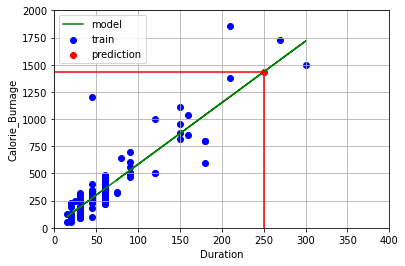

In [ ]:
# Visualize prediction results
import matplotlib.pyplot as plt  # Data visualization with matplotlib package
X_MAX = 400    # Soft-coded "constants"
Y_MAX = 2000
fig, ax = plt.subplots()

# Draw plot
ax.scatter(x_train, y_train, c='blue')           # Training data
ax.plot(x_model, y_model, c='green')             # Model = straight line ("linear regression")
ax.scatter(x_prediction, y_prediction, c='red')  # Prediction made
ax.legend(['model', 'train', 'prediction'])
ax.axhline(y=y_prediction, xmax=x_prediction/X_MAX, c='red')  # Crosshair lines
ax.axvline(x=x_prediction, ymax=y_prediction/Y_MAX, c='red')
ax.grid(True)

# Configure/show plot
plt.ylim(ymin=0, ymax=Y_MAX)
plt.xlim(xmin=0, xmax=X_MAX)
plt.xlabel(x_label)
plt.ylabel (y_label)
plt.show()

## Go beyond

- More advanced models/algo(rithms) (polynomial regression, decision tree, random forest, gradiant boost...)
- Bigger data (SQL/no-SQL databases, APIs, Spark/Hadoop big data solutions...)
- Less structured data (NLP, CV, social media...)
- Deeper dive into  Python
- More customized tool chain (local/team IDE/runtime)
- Commercial grade data vis platforms (Power BI, Tableau...)